In [1]:
import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

C:\Users\Lenovo y540 bnin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


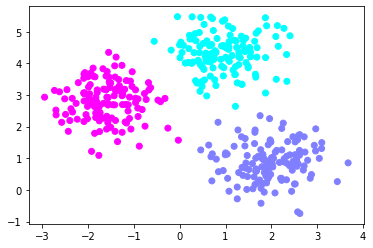

In [2]:
X, y = make_blobs(n_samples=400,cluster_std=0.6,random_state=0)

plt.scatter(X[:,0],X[:,1],c=y,cmap='cool')

In [3]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [4]:
dbscan = DBSCAN(eps = 0.3,metric="euclidean",min_samples = 10)
clusters = dbscan.fit_predict(X_scaled)

In [5]:
#clusters

Text(0.5, 1.0, 'eps=0.3,min samples=10')

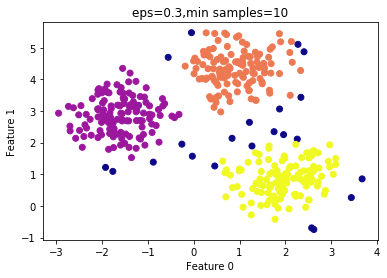

In [6]:
plt.scatter(X[:, 0], X[:, 1], c=dbscan.labels_, cmap="plasma")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.title('eps={},min samples={}'.format(dbscan.eps,dbscan.min_samples))

In [7]:
print("Adjusted Rand Index: %0.3f"% metrics.adjusted_rand_score(y, dbscan.labels_))

Adjusted Rand Index: 0.916


### The parameter eps

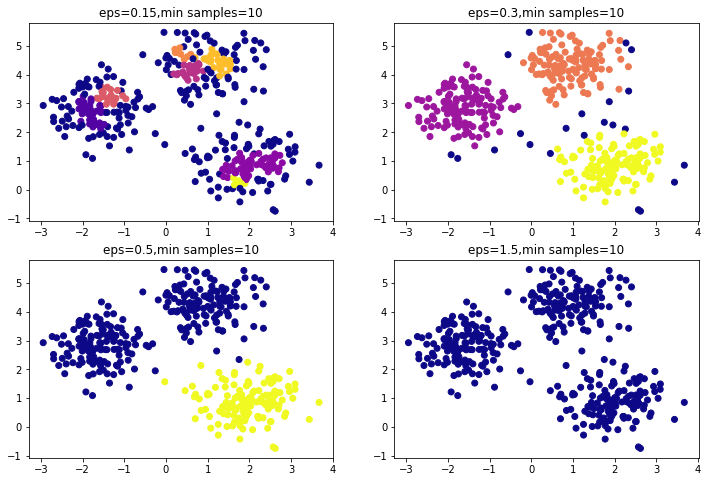

In [8]:
plt.figure(figsize=(12,8))
for i,k in enumerate([.15,.3,.5,1.5],start=1):
    plt.subplot(2,2,i)
    db = DBSCAN(eps = k,metric="euclidean",min_samples = 10)
    db.fit(X_scaled)
    
    plt.scatter(X[:, 0], X[:, 1], c=db.labels_, cmap="plasma")
   # plt.xlabel("Feature 0")
   # plt.ylabel("Feature 1")
    plt.title('eps={},min samples={}'.format(db.eps,dbscan.min_samples))

**The parameter eps** controls the local neighborhood of the points. 

**When chosen too small**, most data will not be clustered at all (and labeled as -1 for “noise”).

**When chosen too large**, it causes close clusters to be merged into one cluster, and eventually the entire data set to be returned as a single cluster. 

### The parameter min_samples

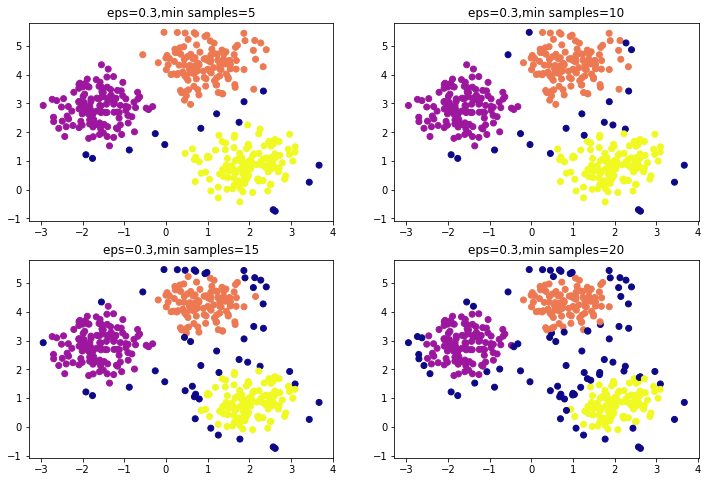

In [9]:
plt.figure(figsize=(12,8))
for i,k in enumerate([5,10,15,20],start=1):
    plt.subplot(2,2,i)
    db = DBSCAN(eps = .3,metric="euclidean",min_samples = k)
    db.fit(X_scaled)
    
    plt.scatter(X[:, 0], X[:, 1], c=db.labels_, cmap="plasma")
   # plt.xlabel("Feature 0")
   # plt.ylabel("Feature 1")
    plt.title('eps={},min samples={}'.format(db.eps,db.min_samples))